# Perform the following tasks:


    Q1. What does the primary analysis of several categorical features reveal?

    Q2. Perform the following Exploratory Data Analysis tasks:
        a. Missing Value Analysis
        b. Label Encoding wherever required
        c. Selecting important features.
        d. Outlier Detection & Handling
        e. Standardize the data using the anyone of the scalers provided by sklearn. 

    Q3. Build the following Supervised Learning models:
        a. Logistic Regression
        b. Naïve Bayes
        c. KNN
        d. SVM

    Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the Passenger will survive or not.



         Dataset link: https://drive.google.com/file/d/1mwLqWC9pLnJdwfPDvM8F_RsPcl_OwfcZ/view?usp=sharing

## Importing required Libraries/ Modules

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Dataset 

In [215]:
tdata = pd.read_csv(r'C:\\Users\\aneek\\Desktop\\revise\\0228\\titanic.csv')
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 01 Primary Analysis

In the primary analysis we can note following type of features in the given dataset

    1. Categorical:
                    Features that can be divided in categories such as Sex, Embarked and Survived
    2. Ordinal:
                    Features that can be sorted such as Pclass.
    3. Continuous:
                    Continuous value features sucha as Age and Fare
    4. String Values/ Not important:
                    Columns which will not be usefull for further analysis such as PassengerId, Name, Cabin and Tecket hence can be deleted

# 2 (A) Missing Value Analysis

In [217]:
tdata.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### We can find that there are two features with missing values Age and Cabin 

In [218]:
(tdata["Cabin"].isna().sum()/891)*100

77.10437710437711

### We can see that almost 77% of the values for the cabin data is missing, also it wont has the importance to find out survival ratio depending on it, Hence removing this feature is the best way to handle it 

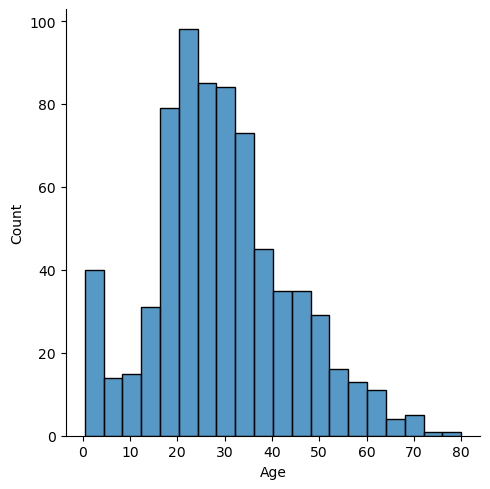

In [219]:
sns.displot(x = "Age", data = tdata)

In [220]:
(tdata["Age"].isna().sum()/891)*100

19.865319865319865

### we can see that only about 20% values are missing hence they can be imputed later with appropriate way

In [221]:
tdata['Age'].mean()

29.69911764705882

In [222]:
tdata['Age'].fillna(tdata['Age'].mean(), inplace = True)

## 2(B) Label Encoding If required 

In [223]:
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### We can find in sex column we have data wich is categorical hence it can be encoded with lable for that we added a new column called Gender

In [224]:
Gender = pd.get_dummies(tdata["Sex"], drop_first = True)

In [225]:
tdata["Gender"] = Gender

In [226]:
tdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


## 2(C) Selecting important Features 

In [227]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Gender       891 non-null    uint8  
dtypes: float64(2), int64(5), object(5), uint8(1)
memory usage: 84.5+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

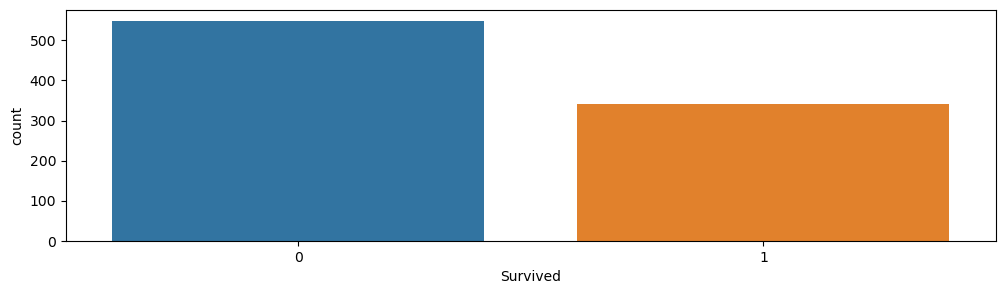

In [228]:
plt.figure(figsize = (12,3))
sns.countplot(x = 'Survived', data = tdata)

<AxesSubplot:xlabel='Survived', ylabel='count'>

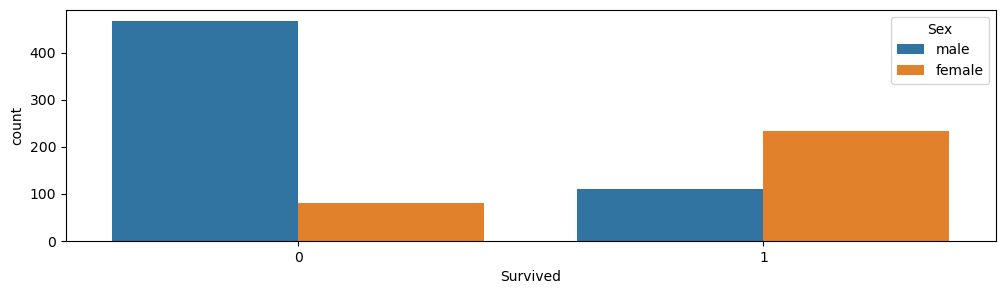

In [229]:
plt.figure(figsize = (12,3))
sns.countplot(x = "Survived", data = tdata, hue = "Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

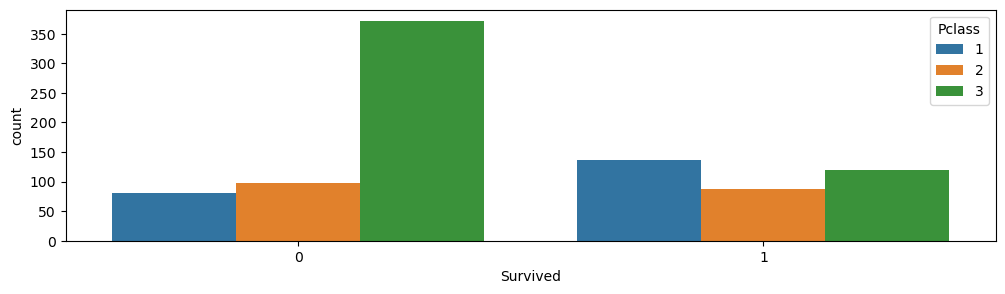

In [230]:
plt.figure(figsize = (12,3))
sns.countplot(x = "Survived", data = tdata, hue = "Pclass")

<AxesSubplot:xlabel='Survived', ylabel='count'>

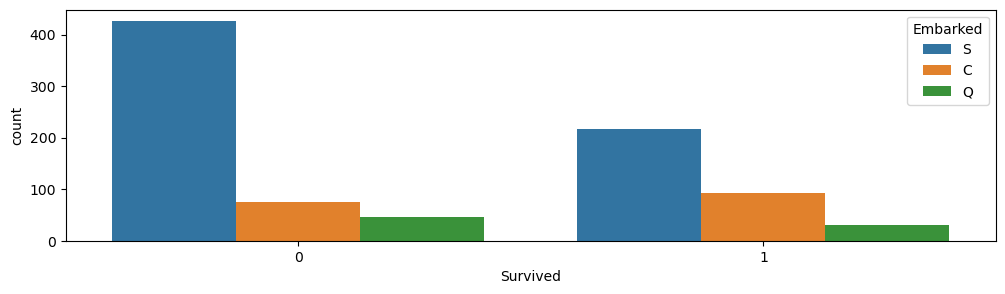

In [231]:
plt.figure(figsize = (12,3))
sns.countplot(x = "Survived", data = tdata, hue = "Embarked")

<AxesSubplot:xlabel='Survived', ylabel='count'>

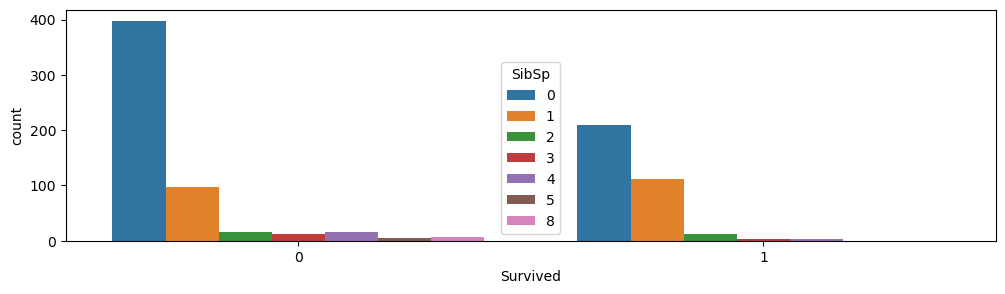

In [232]:
plt.figure(figsize = (12,3))
sns.countplot(x = 'Survived', data = tdata, hue = "SibSp")

<AxesSubplot:xlabel='Survived', ylabel='count'>

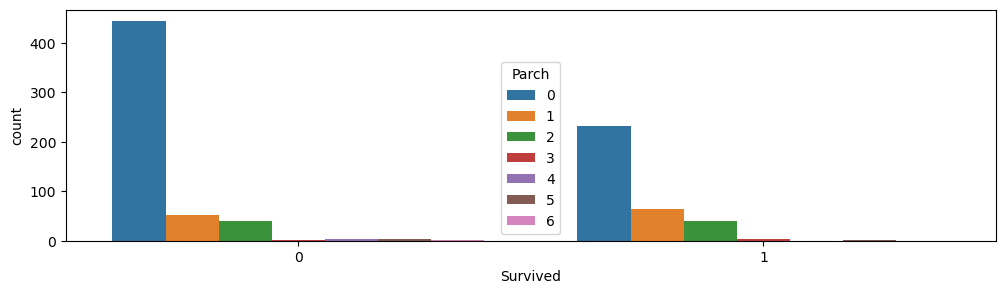

In [233]:
plt.figure(figsize = (12,3))
sns.countplot(x = 'Survived', data = tdata, hue = "Parch")

### We have Following Feature in our dataset
    0   PassengerId  891 non-null    int64  Its a string type data which can not be categoriesed hence can be ommited
    1   Survived     891 non-null    int64  Its a cattegorical target features, Hence important
    2   Pclass       891 non-null    int64  Its important as we can see that in PClass 3 we have less number of survivals
    3   Name         891 non-null    object Its a string type data which can not be categoriesed hence can be ommited
    4   Sex          891 non-null    object    Replaced with Gender, can be deleted
    5   Age          714 non-null    float64   Its a contiuous data hene important
    6   SibSp        891 non-null    int64     We can observe significant variation hence important
    7   Parch        891 non-null    int64     We can observe significant variation hence important
    8   Ticket       891 non-null    object    NOT Important, Uncategorisable String
    9   Fare         891 non-null    float64   NOT Important, Uncategorisable String
    10  Cabin        204 non-null    object    NOT Important, Uncategorisable String with more than 70% null values
    11  Embarked     889 non-null    object    NO considerable differnce on survival status hence can be neglected
    12  Gender       891 non-null    uint8     Important
    
    
#### So we should drop the Unncessory columns
        PassengerID
        Name
        Ticket
        Cabin
        Embarked

In [234]:
tdata.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked", "Sex"], axis = 1, inplace = True)

In [237]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Gender    891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.8 KB


In [238]:
tdata.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# Model Building

In [243]:
X = tdata[["Pclass", "Age", "SibSp", "Parch", "Fare", "Gender"]]

In [244]:
y = tdata ["Survived"]

In [245]:
X

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [246]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = .30, random_state = 42)

## Logistic Regression 

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
lr = LogisticRegression()

In [259]:
lr.fit(X_train, y_train)

LogisticRegression()

In [260]:
predict = lr.predict(X_test)

In [261]:
from sklearn.metrics import confusion_matrix

In [262]:
pd.DataFrame(confusion_matrix(y_test, predict), columns = ["Predicted No", "Predicted Yes"], index = ["Actual No", "Actual Yes"])

,Predicted No,Predicted Yes
Actual No,139,18
Actual Yes,32,79


In [263]:
from sklearn.metrics import classification_report

In [264]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



## Naïve Bayes

## KNN

##  SVM